In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Reading data from csv

In [2]:
data = pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\project ML\\cardio_data_processed.csv")

In [3]:
df=data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Data preprocessing 

In [4]:
df.shape

(68205, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [6]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [8]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [9]:
cols_to_remove=['id','age','bp_category_encoded']
df.drop(cols_to_remove,axis=1,inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


<Axes: xlabel='cardio', ylabel='count'>

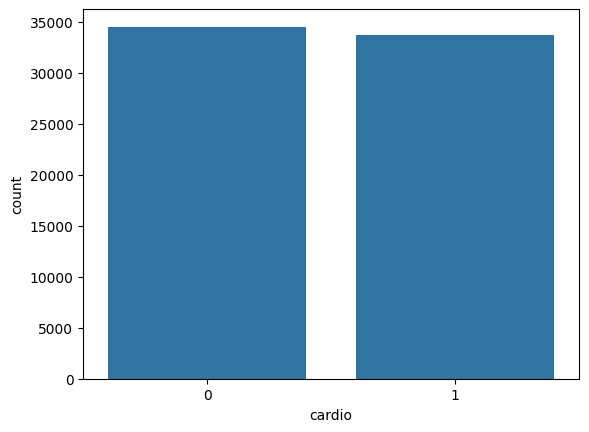

In [10]:
sns.countplot(df,x='cardio')

In [11]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [12]:
categorical=['gender','cardio','bp_category','active'
       'cholesterol', 'gluc', 'smoke', 'alco',]

numerical=[col for col in df.columns if col not in categorical]       

In [13]:
corr=df[numerical].corr()

<Axes: >

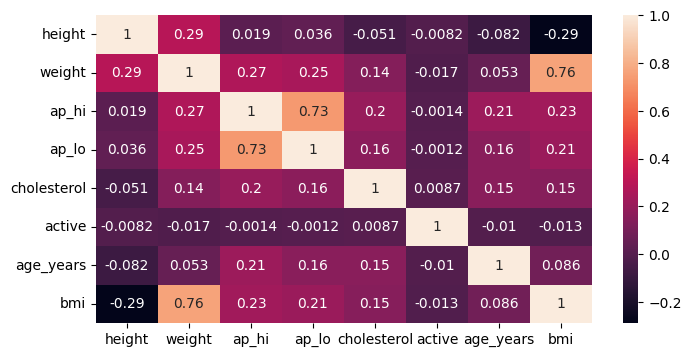

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True)

columns Distribution and outliers

In [15]:
list[numerical]

list[['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'active', 'age_years', 'bmi']]

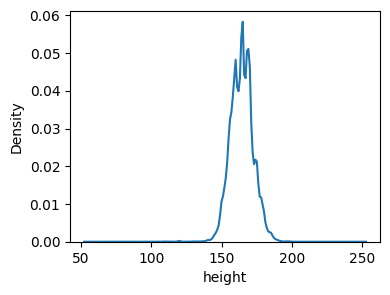

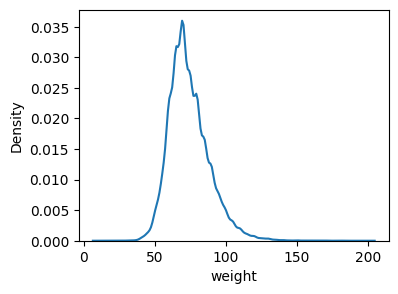

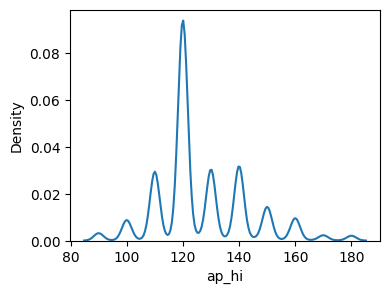

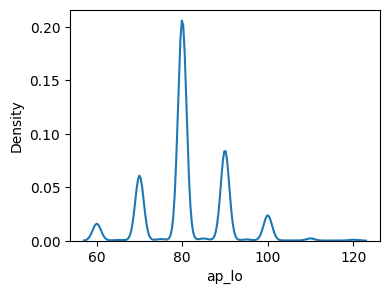

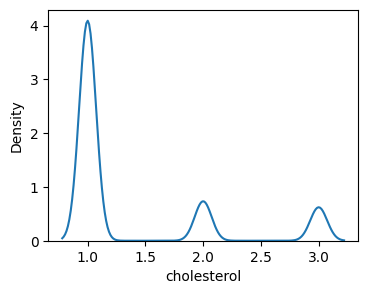

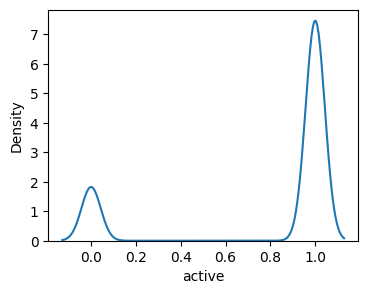

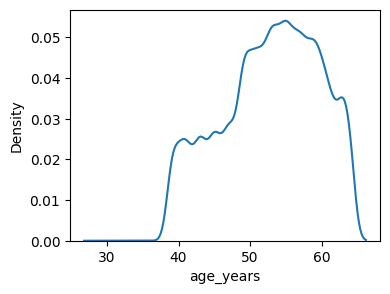

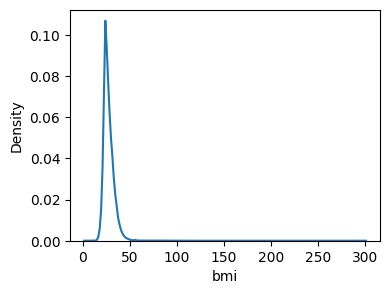

In [16]:
for col in numerical:
    plt.figure(figsize=(4,3))
    sns.kdeplot(df[col])

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


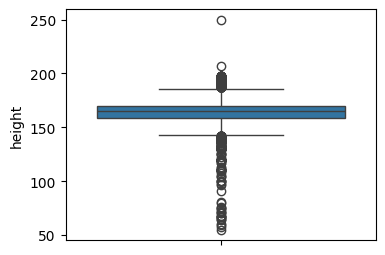

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


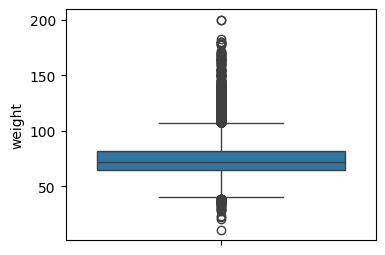

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


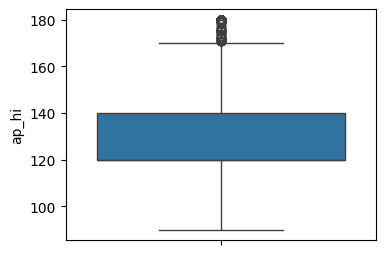

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


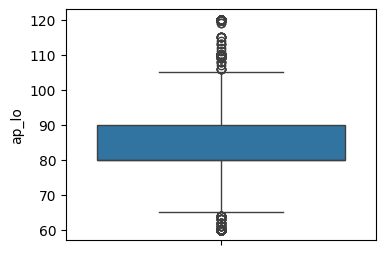

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


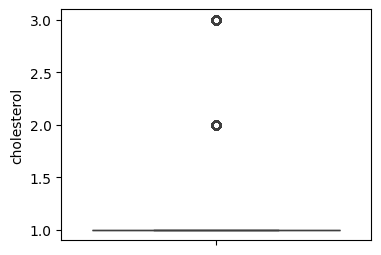

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


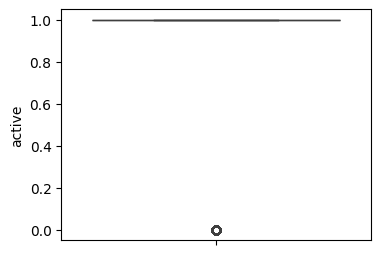

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


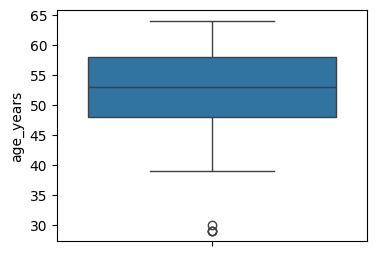

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


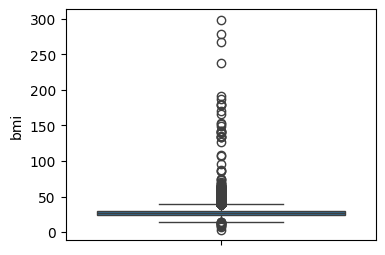

In [17]:
for col in numerical:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])
    plt.show()

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='height'>

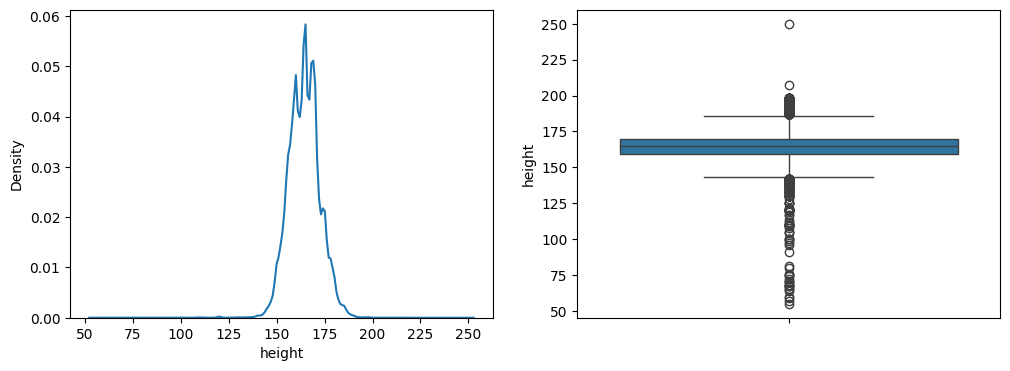

In [18]:
fig,axs=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
sns.kdeplot(df['height'],ax=axs[0])
sns.boxplot(df['height'],ax=axs[1])


In [19]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


splitting the data

In [20]:
X=df.drop('cardio',axis=1)
y=df['cardio']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [22]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
54712,2,169,72.0,160,110,1,1,0,0,0,51,25.209201,Hypertension Stage 2
55902,1,160,93.0,120,80,1,2,0,0,1,58,36.328125,Hypertension Stage 1
21527,2,165,82.0,120,80,1,1,0,0,0,59,30.119376,Hypertension Stage 1
9747,2,179,61.0,110,60,1,1,0,0,1,44,19.038107,Normal
4899,2,164,65.0,120,80,2,1,0,0,1,46,24.167162,Hypertension Stage 1


Scaling the numerical columns

In [23]:
list[numerical]

list[['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'active', 'age_years', 'bmi']]

In [24]:
ct=ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])],
remainder='passthrough')

In [25]:
X_train_transformerd=ct.fit_transform(X_train)

In [26]:
X_train_transformerd

array([[ 0.36363636,  0.        ,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.45454545,  1.23529412,  0.        , ...,  2.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.58823529,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.81818182,  0.35294118, -0.5       , ...,  1.        ,
         0.        ,  0.        ],
       [-1.18181818,  0.88235294,  0.        , ...,  3.        ,
         0.        ,  0.        ],
       [-0.45454545, -0.58823529,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [27]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__cholesterol', 'robsc__active', 'robsc__age_years',
       'robsc__bmi', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__gluc', 'remainder__smoke',
       'remainder__alco'], dtype=object)

In [28]:
pd.DataFrame(data=X_train_transformerd,columns=ct.get_feature_names_out())

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__cholesterol,robsc__active,robsc__age_years,robsc__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__gluc,remainder__smoke,remainder__alco
0,0.363636,0.000000,2.00,3.0,0.0,-1.0,-0.2,-0.180046,0.0,1.0,0.0,2.0,1.0,0.0,0.0
1,-0.454545,1.235294,0.00,0.0,0.0,0.0,0.5,1.601519,1.0,0.0,0.0,1.0,2.0,0.0,0.0
2,0.000000,0.588235,0.00,0.0,0.0,-1.0,0.6,0.606702,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,1.272727,-0.647059,-0.50,-2.0,0.0,0.0,-0.9,-1.168830,0.0,0.0,1.0,2.0,1.0,0.0,0.0
4,-0.090909,-0.411765,0.00,0.0,1.0,0.0,-0.7,-0.347010,1.0,0.0,0.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,-0.454545,-0.176471,0.00,0.0,0.0,0.0,-0.3,0.099379,1.0,0.0,0.0,1.0,1.0,0.0,0.0
51149,-1.000000,-0.764706,-1.35,-1.8,1.0,0.0,-0.4,-0.233159,0.0,0.0,1.0,1.0,1.0,0.0,0.0
51150,0.818182,0.352941,-0.50,-1.0,0.0,0.0,-1.1,-0.091315,0.0,0.0,1.0,2.0,1.0,0.0,0.0
51151,-1.181818,0.882353,0.00,0.0,0.0,0.0,0.5,1.814253,1.0,0.0,0.0,1.0,3.0,0.0,0.0


In [29]:
X_test_transformerd=ct.transform(X_test)

In [30]:
X_train_transformerd.shape

(51153, 15)

In [31]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__cholesterol', 'robsc__active', 'robsc__age_years',
       'robsc__bmi', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__gluc', 'remainder__smoke',
       'remainder__alco'], dtype=object)

In [32]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

Training the model
* Decision Tree Classifier
* Random Forest
* Xgbosst

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train_transformerd,y_train)
pred=dt.predict(X_test_transformerd)

In [35]:
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
accuracy=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
cm=confusion_matrix(y_test,pred)

In [37]:
print(accuracy)
print(recall)


0.6335913675815154
0.6204933586337761


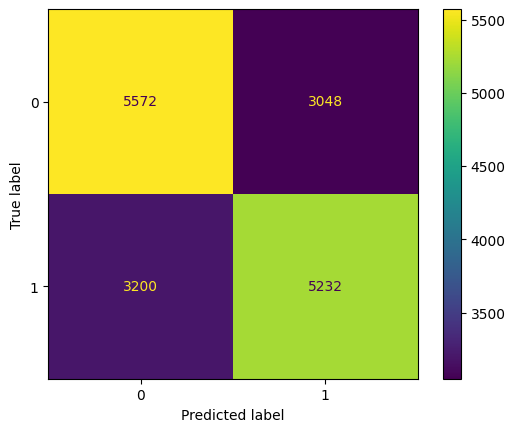

In [38]:
ConfusionMatrixDisplay(cm).plot()

In [39]:
dt2= DecisionTreeClassifier(max_depth=7,criterion='entropy')
dt2.fit(X_train_transformerd,y_train)
pred2=dt2.predict(X_test_transformerd)

In [40]:
pred2

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
accuracy2=accuracy_score(y_test,pred2)
recall2=recall_score(y_test,pred2)
cm2=confusion_matrix(y_test,pred2)

In [42]:
print(accuracy2)
print(recall2)

0.7210297912268355
0.6902277039848197


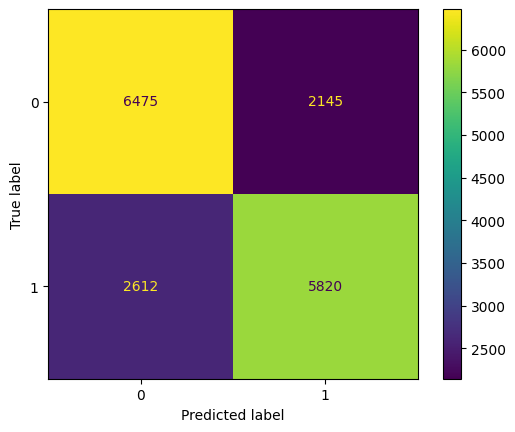

In [43]:
ConfusionMatrixDisplay(cm2).plot()

Hyper parameter tuning

In [47]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [50]:

 param_dict={'criterion': ['gini','entropy'],
 'max_depth': [5,6,7],
 'max_features': [7,8,9,10,12,15],
 'min_samples_split': [8,10,12],}

 randomcv=RandomizedSearchCV(dt,param_distributions=param_dict)
 randomcv.fit(X_train_transformerd,y_train)


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [51]:
cv_pred=randomcv.predict(X_test_transformerd)
cv_acc=accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7284189537884119


In [52]:

cv_rec=recall_score(cv_pred,y_test)
print(cv_acc)

0.7284189537884119


In [63]:
best_dt=randomcv.best_estimator_

In [64]:
best_dt.fit(X_train_transformerd,y_train)
best_pred=best_dt.predict(X_test_transformerd)
acc=accuracy_score(best_pred,y_test)
recal=recall_score(best_pred,y_test)
cm=confusion_matrix(best_pred,y_test)

0.7227304714989444
0.6204933586337761


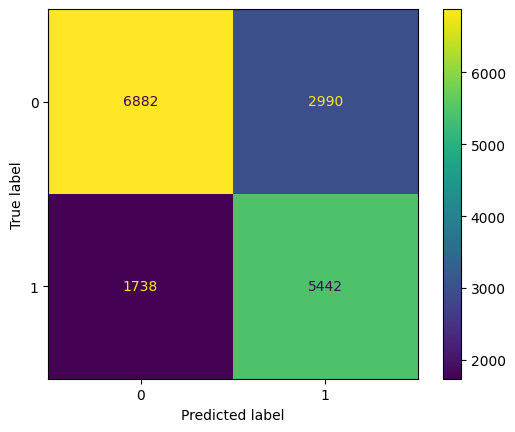

In [66]:
print(acc)
print(recall)
ConfusionMatrixDisplay(cm).plot()